In [89]:
#@title Install pyLDAVis (specific version for Google Collab)
!pip install pyLDAVis==3.4.1

In [90]:
!pip install gensim

In [91]:
from pprint import pprint

# Data Processing

import re
import string
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)

# Topic Modeling - LDA

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# NLTK Stop words

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

# lemmatization

import spacy

# Graphs

import pyLDAvis
import pyLDAvis.gensim
import matplotlib as plt1
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [92]:
df = pd.read_csv('/content/cc.csv', on_bad_lines = "skip")
df.head()

,comment_id,body,score
0,mfpycjj,I'm 99% sure it was an error lol,1
1,mfpxv53,Oh hell yeah 💪🏻 and these are not cheap so now...,1
2,mfpxci5,"Oh, you’re still unsure about fake rainbow flu...",1
3,mfpwzm2,If you decide to sell these please share the l...,1
4,mfpwq3u,That’s a lapis lazuli grade C,1


In [96]:
df = df[df["score"] >= 0]
df.head()

,comment_id,body,score
5,mfpwem3,A live show on Instagram - they were selling o...,2
7,mfpvab9,Ohhh yep one of my favorite stones ever for sure!,2
9,mfptscu,These are so cute!!!,2
10,mfptdlx,Want to smoke the forbidden nug…. 💨,2
13,mfpp7vg,so cute!,2


In [97]:
# Extract title and text of reviews
Comments = df["body"].tolist()

# Remove Punctuations

for i in range(len(Comments)):
    Comments[i] = Comments[i].translate(str.maketrans('', '',
            string.punctuation))

# Remove numbers

for text in range(len(Comments)):
    Comments[text] = ''.join(i for i in Comments[text]
                                 if not i.isdigit())

# Convert text to lower case

for text in range(len(Comments)):
    Comments[text] = Comments[text].lower()

for text in range(len(Comments)):
    Comments[text] = ' '.join(Comments[text].split())

In [98]:
#Lemmatization
nltk.download('wordnet')
nltk.download('punkt_tab')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk import word_tokenize

lemm = WordNetLemmatizer()

lemmatized_word_list = list()

for review in Comments:
    string = review
    string = word_tokenize(string)  # tokenize the reviews

    string = ' '.join([lemm.lemmatize(w) for w in string])

    lemmatized_word_list.append(string)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [99]:
import re

def clean_text(text):
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\b\w+\.(com|org|net|jpg|png|gif|pdf|pjpg|jpeg|svg)\b', '', text)
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

example_text = "Check this image http://example.com/image.jpg and visit www.example.net"
cleaned_text = clean_text(example_text)
print(cleaned_text)
df["body"] = df["body"].astype(str).apply(clean_text)

Check this image  and visit 


In [115]:
stop_words = stopwords.words('english')
stop_words.extend(["review", "ive", "im", "a", "b", "c", "d", "e", "f", "g", "h", "i", "j", "h", "i", "j", "k", "l", "m", "n", "o", "p", "q", "r", "s", "t", "u", "v", "w", "x", "y","z", "id", "em", "go", "wa", "rt", "hr", "ea", "mn", "ok", "im", "ta", "ha", "us", "le", "el", "cr", "bc", "yr", "mo", "op", "bv", "nd", "th", "cd", "pc", "ie", "mm", "dy", "iv", "wi", "qc", "oh", "na", "cu", "ii", "hf", "av", "lg", "ad", "eg","like", "it’s", "its", "one", "even", "see", "look", "would", "definitely",
    "also", "much", "good", "maybe", "could", "make", "that’s", "that", "it.", "&",
    "thank", "really", "think", "know", "people", "photo", "piece", "i’m", "pretty",
     "may", "stone", "use", "want", "buy", "don’t",
    "say", "sure", "get", "feel", "different", "it's", "crystal", "look", ".", "bc",
    "u", "$"," -", "😍","might","thought","never","time","still","but","cotton","!","-","preview","http","looks","like","see", "like", "it's", "its", "one", "even", "see", "look", "would", "definitely",
    "also", "much", "good", "maybe", "could", "make", "that’s", "that", "it.", "&",
    "thank", "really", "think", "know", "people", "photo", "piece", "i’m", "pretty",
     "may", "stone", "use", "want", "buy", "don’t",
    "say", "sure", "get", "feel", "different", "it's", "crystal", "look", ".", "bc",
    "u", "$","-","it’s","😍","might","go","that's","looks","that's","got","yes","things","still",
    "put","something","thought"])
stop_words = list(set(stop_words))

filtered_word_list = list()

for i in range(0, len(lemmatized_word_list)):
    Comments = list()
    for word in lemmatized_word_list[i].split():
        if word not in stop_words:
            Comments.append(word)
        else: continue
    Comments = ' '.join(Comments)
    filtered_word_list.append(Comments)

In [123]:
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


custom_stopwords = set([
    "review", "ive", "im", "id", "go", "wa", "rt", "hr", "ea", "mn", "ok", "im",
    "ta", "ha", "us", "le", "el", "cr", "bc", "yr", "mo", "op", "bv", "nd", "th",
    "cd", "pc", "ie", "mm", "dy", "iv", "wi", "qc", "oh", "na", "cu", "ii", "hf",
    "av", "lg", "ad", "eg", "like", "it’s", "its", "one", "even", "see", "look",
    "would", "definitely", "also", "much", "good", "maybe", "could", "make",
    "that’s", "that", "it.", "&", "thank", "really", "think", "know", "people",
    "photo", "piece", "i’m", "pretty", "may", "stone", "use", "want", "buy", "don’t",
    "say", "sure", "get", "feel", "different", "it's", "crystal", "look", ".", "bc",
    "u", "$", "-", "😍", "might", "thought", "never", "time", "still", "but", "cotton",
    "!", "-", "preview", "http", "looks", "like", "see",  "may", "stone", "use", "want", "buy", "don’t",
    "say", "sure", "get", "feel", "different", "it's", "crystal", "look", ".", "bc",
    "u", "$","-","it’s","😍","might","go","that's","looks","that's","got","yes","things","still",
    "put","something","thought","crystals"
])

stop_words.update(custom_stopwords)

filtered_word_list = []
for review in lemmatized_word_list:
    words = [word.lower() for word in review.split() if word.lower() not in stop_words]
    filtered_word_list.append(" ".join(words))


print(any("like" in review.split() for review in filtered_word_list))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


False


In [124]:
from collections import Counter
# Tokenize all words
all_words = " ".join(df["body"].astype(str)).lower().split()

# Count word occurrences
word_counts = Counter(all_words)

# Define threshold for too common words (e.g., words appearing in > 5% of the dataset)
common_threshold = len(all_words) * 0.05  # 5% of total words

# Identify useful words (not in stopwords and not too common)
filtered_words = {word for word, count in word_counts.items() if word not in stop_words and count < common_threshold}

print(f"✅ Meaningful Words Remaining: {len(filtered_words)}")

✅ Meaningful Words Remaining: 1916


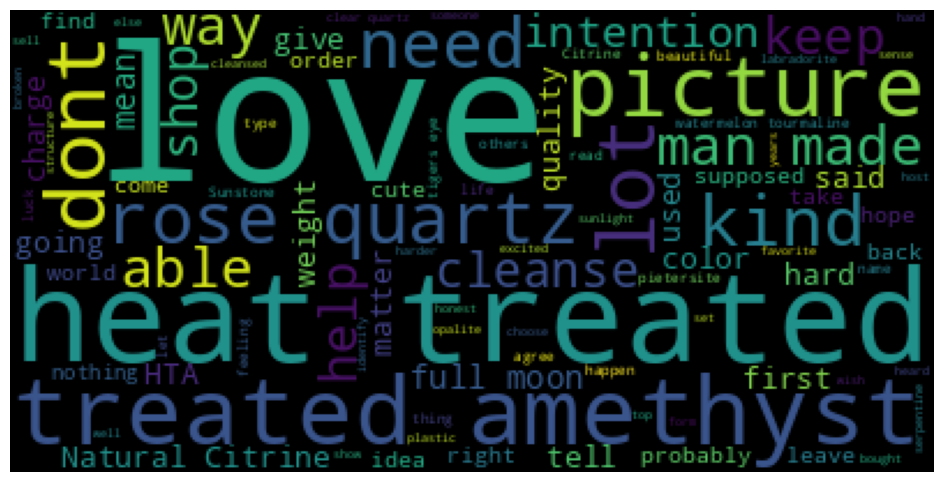

In [125]:
# Create word cloud from the entire corpus of reviews

stpWrds = set(stopwords.words('english'))
plt1.rcParams['figure.figsize'] = (12, 6)

reviewComb = df['body'].tolist()
finalText = ' '.join(reviewComb)


def generate_wordcloud(text):  # optionally add: stopwords=STOPWORDS and change the arg below

    wordcloud = WordCloud(stopwords=stop_words).generate(text)  # set or space-separated string
    plt1.pyplot.imshow(wordcloud)
    plt1.pyplot.axis('off')
    plt1.pyplot.savefig('wordcloud.jpg')
    plt1.pyplot.show()


generate_wordcloud(finalText)

In [126]:
def sent_to_words(sentences):

    for sentence in sentences:
        yield gensim.utils.simple_preprocess(str(sentence), deacc=True)

data_words = list(sent_to_words(filtered_word_list))

In [127]:
# Build the bigram model; higher threshold will give fewer phrases

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)

# Create bigrams

def make_bigrams(texts):
    return([bigram_mod[doc] for doc in texts])

# Form Bigrams

data_words_bigrams = make_bigrams(data_words)

data_lemmatized = data_words_bigrams

print(data_lemmatized[:1])

[['live', 'show', 'instagram', 'selling', 'warehouse', 'priced', 'well', 'couldnt']]


In [128]:
# Create Dictionary

id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus

texts = data_lemmatized

# Term Document Frequency

corpus = [id2word.doc2bow(text) for text in texts]

# View

print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]]


In [129]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus, id2word=id2word, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [130]:
lda_model.print_topics()

[(0,
  '0.021*"opal" + 0.019*"dyed" + 0.018*"glue" + 0.018*"ethiopian" + 0.017*"eye" + 0.014*"real" + 0.013*"tiger" + 0.011*"probably" + 0.011*"cant" + 0.011*"picture"'),
 (1,
  '0.025*"love" + 0.023*"labradorite" + 0.018*"bit" + 0.017*"peridot" + 0.017*"beautiful" + 0.017*"favorite" + 0.016*"long" + 0.015*"well" + 0.013*"actually" + 0.012*"lovely"'),
 (2,
  '0.020*"moon" + 0.018*"cute" + 0.016*"answer" + 0.016*"cleanse" + 0.014*"sorry" + 0.012*"right" + 0.011*"give" + 0.010*"luck" + 0.010*"please" + 0.010*"yellow"'),
 (3,
  '0.044*"quartz" + 0.015*"citrine" + 0.015*"hta" + 0.014*"almost" + 0.013*"rose" + 0.011*"first" + 0.010*"remove" + 0.010*"amethyst" + 0.010*"ever" + 0.009*"gram"'),
 (4,
  '0.023*"opal" + 0.021*"real" + 0.020*"aquamarine" + 0.018*"gorgeous" + 0.015*"grade" + 0.013*"light" + 0.010*"quality" + 0.010*"bowl" + 0.010*"full" + 0.010*"color"'),
 (5,
  '0.022*"opalite" + 0.021*"made" + 0.017*"dont" + 0.015*"man" + 0.014*"claim" + 0.013*"thing" + 0.011*"intention" + 0.010*"

In [131]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.038899 -0.026796       1        1  12.813366
6      0.109932  0.141523       2        1  12.743648
9     -0.125057  0.064470       3        1  12.197381
5     -0.100967  0.103020       4        1  11.177601
3      0.204362  0.017882       5        1   9.971888
7      0.151883  0.188153       6        1   9.736456
2     -0.157774 -0.013166       7        1   9.077006
4     -0.114608 -0.036351       8        1   8.325854
0     -0.182703 -0.119042       9        1   7.526027
1      0.176032 -0.319692      10        1   6.430771, topic_info=          Term         Freq        Total Category  logprob  loglift
60     citrine  6973.000000  6973.000000  Default  30.0000  30.0000
142       heat  3540.000000  3540.000000  Default  29.0000  29.0000
320       opal  6181.000000  6181.000000  Default  28.0000  28.0000
82   beautiful  5241.000000  5241.000000  Default  27.0000  27.0000
59    amethyst  7039.000000  7039.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
56         lol   529.551432  2604.562015  Topic10  -4.5316   1.1511
974      flash   463.992096  1742.393764  Topic10  -4.6637   1.4209
329       give   424.505191  2020.427258  Topic10  -4.7527   1.1839
54         hta   421.933187  2907.833257  Topic10  -4.7588   0.8138
59    amethyst   394.283941  7039.348513  Topic10  -4.8265  -0.1381

[612 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
511       1  0.364215      able
511       2  0.132938      able
511       3  0.502009      able
454       2  0.490811  actually
454       5  0.120388  actually
...     ...       ...       ...
485       3  0.378381     youve
485      10  0.619474     youve
803       1  0.998834       yup
1321      7  0.997595   zoisite
936       3  0.997209      zoom

[1027 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 7, 10, 6, 4, 8, 3, 5, 1, 2])